In [2]:
from sklearn.datasets import load_iris



In [3]:
data=load_iris()


In [4]:
data.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
type(data)

sklearn.utils.Bunch

In [7]:
data.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [16]:
df.shape

(150, 4)

In [21]:
y=data.target

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Bota\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [24]:
dec_tree=DecisionTreeClassifier(max_depth=3) 
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
from sklearn.metrics import accuracy_score
y_pred=dec_tree.predict(x_test)
print("Accuracy score for train data:", accuracy_score(y_train, dec_tree.predict(x_train)))
print("Accuracy score for test data:", accuracy_score(y_test, y_pred))

Accuracy score for train data: 0.97
Accuracy score for test data: 0.98


In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(dec_tree,x_train,y_train,cv=10)



array([1.        , 0.90909091, 1.        , 0.63636364, 0.9       ,
       1.        , 1.        , 0.77777778, 1.        , 0.88888889])

In [30]:
np.mean(cross_val_score(dec_tree,x_train,y_train,cv=10))

0.9434343434343434

In [35]:
from sklearn.model_selection import GridSearchCV

In [44]:
tree_params={'max_depth':range(2,22),'max_features':range(1,5)}
dec_tree_grid= GridSearchCV (dec_tree, param_grid=tree_params,cv=5,n_jobs=-1)


In [45]:
dec_tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 22), 'max_features': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
dec_tree_grid.best_params_

{'max_depth': 3, 'max_features': 3}

In [47]:
dec_tree_grid.best_score_

0.96

In [48]:
dec_tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
y_pred_grid=dec_tree_grid.best_estimator_.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred_grid)

0.98

In [66]:
list_train=[]
list_test=[]
for i in tree_params['max_depth']:
    dec_tree1=DecisionTreeClassifier(max_depth=i)
    dec_tree1.fit(x_train,y_train)
    list_train.append(accuracy_score(y_train,dec_tree1.predict(x_train)))
    list_test.append(accuracy_score(y_test,dec_tree1.predict(x_test)))

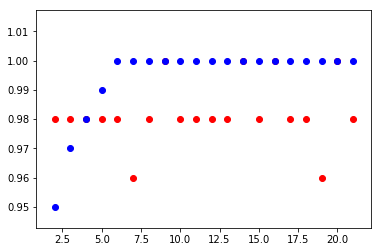

In [67]:
import  matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(tree_params['max_depth'], list_test, color = 'r')
plt.scatter(tree_params['max_depth'], list_train, color = 'b')


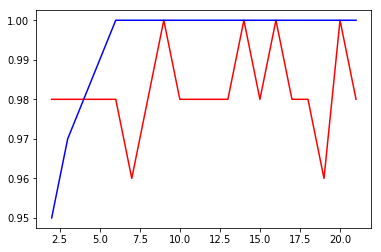

In [68]:
plt.plot(tree_params['max_depth'], list_test, color = 'r')
plt.plot(tree_params['max_depth'], list_train, color = 'b')


In [69]:
rf_tree=RandomForestClassifier(random_state=0,n_jobs=-1)
rf_tree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
y_pred_rf=rf_tree.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.98

In [72]:
rf_tree.predict_proba(x_test)

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.1, 0.9],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0.1, 0.9],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.1, 0.9],
       [0.1, 0.9

In [74]:
y_pred_names=data.target_names[rf_tree.predict(x_test)]
y_test_names=data.target_names[y_test]

In [75]:
pd.crosstab(y_test_names,y_pred_names,rownames=['Actual'],colnames=['Predicted'])

Predicted,setosa,versicolor,virginica
Actual,,,
setosa,19,0,0
versicolor,0,15,0
virginica,0,1,15


In [80]:
ran_forest_grid=GridSearchCV(rf_tree,param_grid=tree_params,cv=5,n_jobs=-1)
ran_forest_grid.fit(x_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 22), 'max_features': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
ran_forest_grid.best_params_

{'max_depth': 3, 'max_features': 4}

In [85]:
ran_forest_grid.best_score_

0.95